<a href="https://colab.research.google.com/github/mikislin/summer20-Intro-python/blob/master/04_Numpy_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Import csv-file as np.array and data description**


download and add to working directory patch-clamp_sweeps.csv

https://drive.google.com/file/d/14BjA02ttm3WIvs3Q-iGwgo1uB5rLnoG-/view?usp=sharing

The data array contains 11 columns. The first column contains time values, and the rest contain electrode data recorded from 10 consecutive trials.

It’s possible to use NumPy to directly read csv or other files into arrays. We can do this using the **numpy.genfromtxt** or **np.loadtxt** functions. We can use it to read in our initial data

Using `np.genfromtxt` gives you some options like the parameters `missing_values`, `filling_values` that can help you dealing with an incomplete csv. Or if you want to have a structured array with fields, as it allows you to say `names=True` and the field names will be automatically generated from the first line of the file

`np.loadtxt ` has a useful parameter unpack  when you want to put each column of the text file in a different variable. Example:

`x, y, z = np.loadtxt(filename, unpack=True)`

In [ ]:
# load and check shape
import numpy as np
ephys_data = np.loadtxt("patch-clamp_sweeps.csv", delimiter=",", skiprows=1)
print(ephys_data.shape)

(673, 11)


In [ ]:
# Separate time values from the rest of the data
etime = ephys_data[:, 0]
ephys_data = ephys_data[:, 1:]

if any of this is confusing, just ignore it for now:

`import matplotlib`

not needed right now the line below with pyplot is sufficient

`import matplotlib.pyplot as pl`

this is the important line for giving us the module and code we need today for plotting

a lot of people use `plt` instead of `pl`




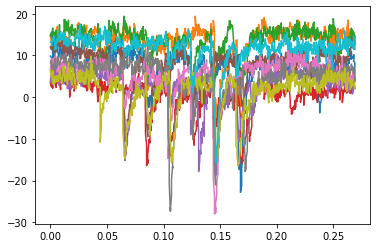

In [ ]:
import matplotlib.pyplot as plt

# Plot all sweeps overlaid
plt.plot(etime, ephys_data)
plt.show()

In [ ]:
# Print some statistics on the entire dataset 
print("min:", ephys_data.min(), "max:", ephys_data.max())
print("mean:", ephys_data.mean(), "stdev:", ephys_data.std())

min: -27.97 max: 19.391
mean: 6.703341753343239 stdev: 6.387010694610659


In [ ]:
# Compute the mean value from each recording
# (average all values along axis 0)

print("Mean of each recording:", ephys_data.mean(axis=0))


Mean of each recording: [ 7.24741456 13.31140862 13.53353046  0.20036404  2.43981724  7.96416642
  5.298789    4.18689153  1.33420505 11.51683061]


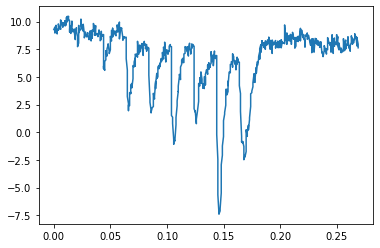

In [ ]:
# For each time point, compute (and plot) the average values across all recordings
# (mean of all values along axis 1)

plt.plot(etime, ephys_data.mean(axis=1));

In [ ]:
# Median value of all samples at 100ms
idx = np.where(etime ==0.1)
np.median(ephys_data[:int(idx[0][0])])

7.8985

In [ ]:
# Sum (area under curve) for each recording:

AUC = np.sum(ephys_data, axis=0)

In [ ]:
# Minimum (peak) value of each recording occurs at indices

minpeak = np.argmin(ephys_data, axis=0)

In [ ]:
# Minimum (peak) value of average recording occurs at t =

minpeaktime = 0.4e-3 * np.argmin(ephys_data.mean(axis=1))

In [ ]:
# save 

np.savez('ephys_results.npz', ephys_data, minpeak, minpeaktime, AUC)

In [ ]:
# load back and verified
reloaded_data = np.load("ephys_results.npz")
if (reloaded_data['arr_0'] == ephys_data).all():
    print("Data was saved and verified!")

Data was saved and verified!
